# Practice Question
1. Load the iris dataset (first two features)
2. Divide data into training and testing data (80-20 split)
3. Run logisitic regression on this data (play with parameters using GridSearchCV to improve accuracy)
4. Plot decision boundaries as done here
5. Use SGDClassifier and use gridsearch to tune the parameters {penalty, alpha, eta0}. Use loss='log', learning_rate='constant' and n_iter=100.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [3]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

parameters = { 'penalty': ['l1','l2'], 
              'C':[0.1, 0.5, 1, 2, 3, 4, 5, 10, 100, 200]}
logreg = LogisticRegression()
clf = GridSearchCV(logreg, parameters, verbose=True, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
train_acc = accuracy_score(clf.predict(X_train), y_train)
print ('Selected Parameters', clf.best_params_)
print ('Training Accuracy = ' + str(train_acc))
print ('Test Accuracy = ' + str(accuracy))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Selected Parameters {'C': 2, 'penalty': 'l1'}
Training Accuracy = 0.8083333333333333
Test Accuracy = 0.7666666666666667


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.3s finished


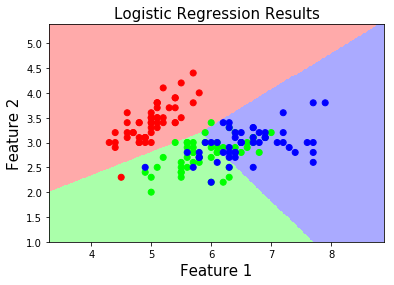

In [4]:
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


logreg = LogisticRegression(C=2, penalty='l1')
logreg.fit(X[:,:2], y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('Feature 1', fontsize=15)
plt.ylabel('Feature 2', fontsize=15)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Logistic Regression Results', fontsize=15)
plt.show()

In [9]:
# search eta
from sklearn.linear_model import SGDClassifier


parameters = { 'penalty': ['l1','l2'], 
              'alpha':[0.00001, 0.0001, 0.001, 0.01, 1, 10, 100],
              'eta0': [0.00001,0.0001,0.001,0.01,0.1,1,10,100]}

sgd = SGDClassifier(loss='log', learning_rate='constant', eta0=0.0001, random_state=7,max_iter=100)
clf = GridSearchCV(sgd, parameters, verbose=True, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_pred, y_test)
train_acc = accuracy_score(clf.predict(X_train), y_train)
print ('Selected Parameters', clf.best_params_)
print ('Training Accuracy = ' + str(train_acc))
print ('Test Accuracy = ' + str(accuracy))

Fitting 3 folds for each of 112 candidates, totalling 336 fits
Selected Parameters {'alpha': 0.001, 'eta0': 10, 'penalty': 'l1'}
Training Accuracy = 0.6833333333333333
Test Accuracy = 0.5666666666666667


[Parallel(n_jobs=-1)]: Done 336 out of 336 | elapsed:    0.5s finished
